<a href="https://colab.research.google.com/github/hahahonline/Rede-Neural-Convolucional---Cifar/blob/main/Rede_Neural_Convolucional_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
#!pip install keras --upgrade
from tensorflow.keras.preprocessing.image import array_to_img
from PIL import Image

# Carrega os dados CIFAR-10
(x_treino, y_treino), (x_teste, y_teste) = cifar10.load_data()

# Seleciona uma imagem de exemplo
image = x_treino[1000]

# Cria um objeto PIL Image a partir do array da imagem
pil_image = array_to_img(image)

# Redimensiona a imagem para 1000x1000
resized_image = pil_image.resize((1000, 1000))

# Mostra a imagem redimensionada
plt.imshow(resized_image)
plt.show()


In [3]:
# Carrega os dados CIFAR-10
(x_treino, y_treino), (x_teste, y_teste) = cifar10.load_data()

In [4]:
# Pré-processa os dados
x_treino = x_treino.astype('float32') / 255
x_teste = x_teste.astype('float32') / 255
y_treino = to_categorical(y_treino, 10)
y_teste = to_categorical(y_teste, 10)

In [5]:
# Cria o modelo da rede neural convolucional
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 10, activation='sigmoid'))

In [6]:
# Compila o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Treina o modelo
#batch_size = tamanho do lote 
#epochs = número de vezes que o modelo de rede neural verá todo conjunto de dados de treinamento 
model.fit(x_treino, y_treino, epochs=10, batch_size=32, validation_data=(x_teste, y_teste), shuffle = False)


Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.8797 - accuracy: 0.6961 - val_loss: 0.9444 - val_accuracy: 0.6769
Epoch 2/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.8209 - accuracy: 0.7180 - val_loss: 0.9315 - val_accuracy: 0.6829
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7635 - accuracy: 0.7384 - val_loss: 0.9319 - val_accuracy: 0.6880
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7141 - accuracy: 0.7533 - val_loss: 0.9462 - val_accuracy: 0.6890
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6701 - accuracy: 0.7690 - val_loss: 0.9651 - val_accuracy: 0.6847
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.6309 - accuracy: 0.7828 - val_loss: 0.9875 - val_accuracy: 0.6809
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5950 - accuracy: 0.7965 - val_loss: 1.0305 -

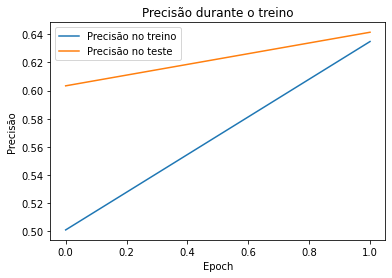

In [8]:
plt.plot(model.history.history['accuracy'], label='Precisão no treino')
plt.plot(model.history.history['val_accuracy'], label='Precisão no teste')
plt.title('Precisão durante o treino')
plt.xlabel('Epoch')
plt.ylabel('Precisão')
plt.legend()
plt.show()